# Check sex chromosomes for caudate nucleus

In [1]:
suppressMessages({library(dplyr)
                  library(ggpubr)})

## Get and annotated sex from genotypes

In [2]:
sexcheck_file = paste0('/ceph/projects/brainseq/genotype/download/topmed/',
                       'convert2plink/filter_maf_01/check_sex/_m/LIBD_Brain_TopMed.sexcheck')
pheno_file = '/ceph/users/jbenja13/projects/sex_sz_ria/input/phenotypes/_m/phenotypes.csv'

dt = data.table::fread(sexcheck_file) %>% 
    inner_join(data.table::fread(pheno_file), by=c("FID"="BrNum")) %>%
    select(c("FID", "Dx", "Sex", "Age", "F", "SNPSEX")) %>%
    distinct() %>% mutate_if(is.character, as.factor)
levels(dt$Sex) <- c('Female', 'Male')
dt %>% head(2)

FID,Dx,Sex,Age,F,SNPSEX
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>
Br763,Schizo,Male,75.22,1,1
Br822,Control,Male,26.73,1,1


## Plot F estimate

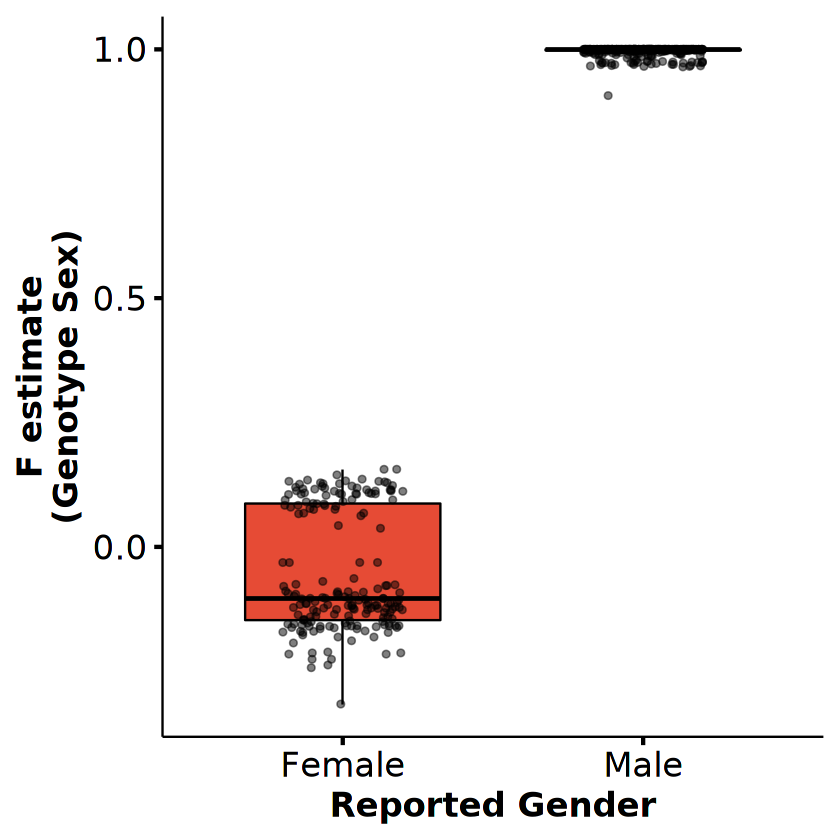

In [3]:
fig <- ggboxplot(dt, x = "Sex", y = "F", fill='Sex', width=0.65, palette='npg', 
                 xlab='Reported Gender', ylab='F estimate\n(Genotype Sex)', 
                 ggtheme=theme_pubr(base_size=20), add="jitter", 
                 add.params=list(alpha=0.5), legend="None") +
    font("xy.title", face='bold')
fig

In [4]:
ggsave("sex_check.png")
ggsave("sex_check.pdf")
ggsave("sex_check.svg")

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [5]:
dt %>%
  group_by(Sex) %>%
  summarize(mean_size = mean(F, na.rm = TRUE), max = max(F, na.rm=TRUE))

Sex,mean_size,max
<fct>,<dbl>,<dbl>
Female,-0.05355674,0.156
Male,0.99623137,1.000


## Check that reported gender matches genotype sex

In [6]:
sum(dt$Sex == "Male")
sum(dt$SNPSEX == 1 & dt$Sex == "Male")

[1] 408

[1] 408

In [7]:
sum(dt$Sex == "Female")
sum(dt$SNPSEX == 2 & dt$Sex == "Female")

[1] 187

[1] 187

### Examine number of X chromosomes

In [8]:
table(dt$SNPSEX)


  1   2 
408 187 

In [9]:
table(dt$Sex)


Female   Male 
   187    408 

#### Summary: All samples have reported gender matching genotype sex

## Reproducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-08-01 15:56:07 EDT"

   user  system elapsed 
  3.079   0.137   3.472 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-08-01                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 abind         1.4-5    2016-07-21 [1] CRAN (R 4.0.2)
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 